## Table of Contents

* [Homework# 3](#Homework#3)
    * [Load model data](#Data_model_load)
    * [Calculate data model](#Calculate_data_model)
    * [Calculate model TP TN FP FN](#Calculate_TP_TN_FP_FN)
    * [Calculate model accuracy](#Model_Accuracy)
    * [Calculate model precision](#Model_Precission)
    * [Confusion Matrix](#Confusion_Matrix)

* Author: Gerti Kulla
* Class: Brooklyn College/Cisc7700X 
* Semester: Fall 2024

# Homework#3

CISC 7700X HW# 3: We have a labeled training data set: hw3.data1.csv.gz.
Thinking of a linear model, we come up with:

y = 24*column1 + -15*column2 + -38*column3 + -7*column4 + -41*column5 + 35*column6 + 0*column7 + -2*column8 + 19*column9 + 33*column10 + -3*column11 + 7*column12 + 3*column13 + -47*column14 + 26*column15 + 10*column16 + 40*column17 + -1*column18 + 3*column19 + 0*column20 + -6

if y is > 0 then 1 othewise -1.

What is the accuracy? Calculate the confusion matrix for this model. If cost of a false negative is $1000, and cost of a false positive is $100, (and $0 for an accurate answer), what is the expected economic gain?

How can we tweak the model to increase economic gain? Come up with a model that maximizes economic gain (approximations are OK; try guestimating a few possibilities in a spreadsheet, etc.).

Email the numbers and the steps you used to calculate things (you can do most of this homework in a spreadsheet [Excel?], but I highly encourage you to write code---learn Python if not sure where to start).

## Data_model_load

In [23]:
!pip install seaborn scipy statsmodels
!pip install -U scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('http://theparticle.com/cs/bc/dsci/hw3.data1.csv.gz', compression='gzip')

print(df.head())

   column1  column2  column3  column4  column5  column6  column7  column8  \
0      -40      -31       36      -43       52       10      -31       41   
1       42      -42      -37       49       33       34       -4       -2   
2      -28      -19      -27       -4       42      -37      -38      -22   
3      -44        0       20      -28       -5       28       15      -41   
4       46        9        8      -10       27       34      -25       11   

   column9  column10  ...  column12  column13  column14  column15  column16  \
0      -31        -6  ...         8        37       -30        34       -15   
1       50        10  ...        -8         7       -50        16         9   
2      -27       -36  ...       -31        29       -12        -6        31   
3      -13        32  ...       -38       -30       -52        37       -22   
4       47       -18  ...        23       -47       -25        -4        11   

   column17  column18  column19  column20  label  
0       -42

## Calculate_data_model

In [7]:
def compute_model_values(dataframe):
    X_actual = []

    for index, row in dataframe.iterrows():
        result = 24*row['column1'] -15*row['column2'] -38*row['column3'] -7*row['column4'] -41*row['column5'] + 35*row['column6'] + 0*row['column7'] -2*row['column8'] + 19*row['column9'] + 33*row['column10'] -3*row['column11'] + 7*row['column12'] + 3*row['column13'] -47*row['column14'] + 26*row['column15'] + 10*row['column16'] + 40*row['column17'] -1*row['column18'] + 3*row['column19'] + 0*row['column20'] -6
        if result > 1:
            X_actual.append(1)
        else:
            X_actual.append(-1)

    return pd.DataFrame(X_actual, columns=['X_data'])  

X_actual_df = compute_model_values(df)
print(X_actual_df)

      X_data
0         -1
1          1
2         -1
3          1
4          1
...      ...
9995       1
9996       1
9997       1
9998      -1
9999       1

[10000 rows x 1 columns]


## Calculate_TP_TN_FP_FN

In [8]:
Y_actual_df = df['label']

df3 = pd.concat([X_actual_df, Y_actual_df], axis=1)

def compute_model(X_actual_df, Y_actual_df):
    records = 10000
    match = TP = TN = FP = FN = 0

    for _, row in df3.iterrows():
        if( row['X_data'] == row['label'] and row['X_data'] > 0):
            TP += 1;
            match += 1;
        elif( row['X_data'] == row['label'] and row['X_data'] < 0):
            TN += 1;
            match += 1;
        elif( row['X_data'] > 0 and row['label'] < 0):
            FP += 1;
        elif( row['X_data'] < 0 and row['label'] > 0):
            FN += 1;

    return match, TP, TN, FP, FN

result = compute_model(X_actual_df, Y_actual_df)

TP=result[1]
TN=result[2]
FP=result[3]
FN=result[4]

print(f"match: {result[0]}, True positive: {result[1]}, True negative: {result[2]}, False positive: {result[3]*100}, False negative : {result[4]*1000}")
  

match: 8808, True positive: 3549, True negative: 5259, False positive: 48400, False negative : 708000


## Model_Accuracy

In [9]:
#model accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Model accuracy: {accuracy}') 

Model accuracy: 0.8808


## Model_Precission

In [12]:
#model precision

precision = TP/(TP+FP)
print(f'Model precision: {round(precision,4)}')

Model precision: 0.88


## Confusion_Matrix

In [15]:
conf_matrix = confusion_matrix(df3['X_data'],df3['label'])

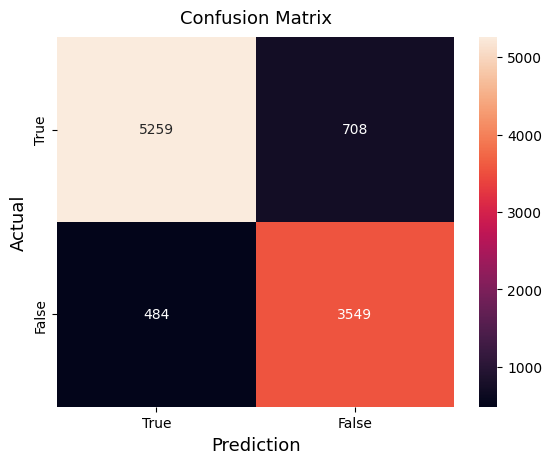

In [19]:
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['True','False'], yticklabels=['True','False']) 
plt.title('Confusion Matrix', fontsize=13, pad=10)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13) 
plt.show()

In [20]:
#False positive: 48400
#False negative : 708000

Economic_Gain = (TP+TN)*0 - (FP*100 + FN*1000)
print(f"Economic_Gain: {Economic_Gain}")

Economic_Gain: -756400


In [21]:
#tweaking the model to get better economic gain
def compute_modified_model(dataframe):
    X_actual = []

    for index, row in dataframe.iterrows():
        result = 24*row['column1'] -15*row['column2'] -38*row['column3'] -7*row['column4'] -41*row['column5'] + 35*row['column6'] + 0*row['column7'] -2*row['column8'] + 19*row['column9'] + 33*row['column10'] -3*row['column11'] + 7*row['column12'] + 3*row['column13'] -47*row['column14'] + 26*row['column15'] + 10*row['column16'] + 40*row['column17'] -1*row['column18'] + 3*row['column19'] + 0*row['column20'] +80
        if result > 1:
            X_actual.append(1)
        else:
            X_actual.append(-1)

    return pd.DataFrame(X_actual, columns=['X_data']) 

def compute_model(X_actual_df, Y_actual_df):
    df3 = pd.concat([X_actual_df, Y_actual_df], axis=1)

    records = 10000
    match = TP = TN = FP = FN = 0

    for _, row in df3.iterrows():
        if( row['X_data'] == row['label'] and row['X_data'] > 0):
            TP += 1;
            match += 1;
        elif( row['X_data'] == row['label'] and row['X_data'] < 0):
            TN += 1;
            match += 1;
        elif( row['X_data'] > 0 and row['label'] < 0):
            FP += 1;
        elif( row['X_data'] < 0 and row['label'] > 0):
            FN += 1;

    return match, TP, TN, FP, FN

X_actual_df = compute_modified_model(df)
result = compute_model(X_actual_df, Y_actual_df)
Economic_Gain = (result[1]+result[2])*0 - (result[3]*100 + result[4]*1000) #= 0 - 48400 - 708000 = -756400
print(f"Economic Gain: {Economic_Gain}")


Economic Gain: -684800


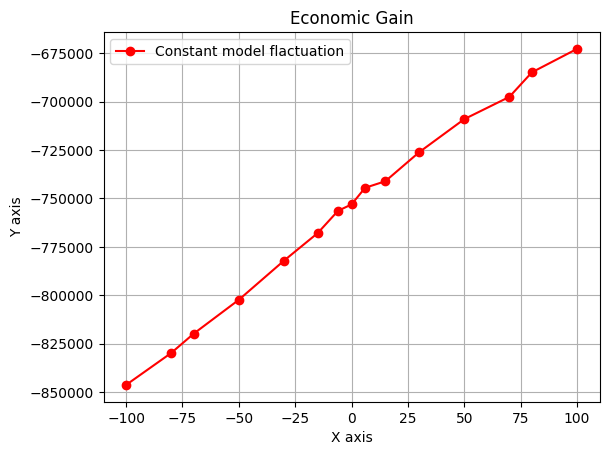

In [22]:
#flactuating constant from model increases/decreases economic gain
x_1 = np.array([-100, -80, -70, -50, -30, -15, -6, 0, 6, 15, 30, 50, 70, 80, 100])
y_1 = np.array([-846400,-829900,-819900,-802400,-782200,-767900, -756400, -753100, -744500,-741100,-726100,-709000, -697500,-684800,-672700])
plt.title("Economic Gain")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x_1, y_1, color="red", marker="o", label="Constant model flactuation")
plt.legend()
plt.grid()
plt.show()